In [95]:
import tensorflow as tf

# import tensorflow.contrib.slim as slim
# from input import inputs
# from model.lenet import lenet
# from model.vgg16 import vgg16
# from model.cifarnet import cifarnet
# from model.alexnet import alexnet_v2
# from model.resnet_v1 import resnet_v1_50
import pandas as pd
import cv2
import argparse
from model.lenet import lenet
from input import inputs

In [96]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

In [10]:
def export_result(frame_id_lst, steering_angle_lst):
    dict = {'frame_id': frame_id_lst, 'steering_angle': steering_angle_lst}
    pd.DataFrame(dict).to_csv("result/%s_output.csv" % args.model,index=False)

In [11]:
# flags.DEFINE_string('train_dir', './data',
#                     'Directory with the training data.')
# flags.DEFINE_integer('batch_size', 200, 'Batch size.')
# flags.DEFINE_integer('num_batches', 100, 'Num of batches to evaluate.')
# flags.DEFINE_string('model', None, "Model name")

In [12]:
with tf.Graph().as_default():
    images, labels = inputs("./data", True, 1000, 100,one_hot_labels=False)
    predictions = lenet(images)
        # Create the model structure. (Parameters will be loaded below.)
#     predictions, end_points = regression_model(inputs, is_training=False)
    ckpt_dir = 'log/lenet/train'
    # Make a session which restores the old parameters from a checkpoint.
    sv = tf.train.Supervisor(logdir=ckpt_dir)
    with sv.managed_session() as sess:
        predictions = sess.run([predictions])
        print(predictions)

image:  Tensor("input/Reshape:0", shape=(60, 80, 3), dtype=float32)
label1:  Tensor("input/Reshape_1:0", shape=(1,), dtype=float32)
label2:  Tensor("input/Reshape_1:0", shape=(1,), dtype=float32)
[array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.02657133],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.

In [20]:
with tf.Session() as sess:
    images, labels = inputs("./data", False, 200, 100,one_hot_labels=False)
    predictions = lenet(inputs)
    ckpt_dir = 'log/lenet/train'
    # Make a session which restores the old parameters from a checkpoint.
    sv = tf.train.Supervisor(logdir=ckpt_dir)
    with sv.managed_session() as sess:
        predictions = sess.run([predictions])

image:  Tensor("input_5/Reshape:0", shape=(60, 80, 3), dtype=float32)
label1:  Tensor("input_5/Reshape_1:0", shape=(1,), dtype=float32)
label2:  Tensor("input_5/Reshape_1:0", shape=(1,), dtype=float32)


TypeError: Expected binary or unicode string, got <function inputs at 0x113465d90>

In [6]:
### save testdata into tfrecords format
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import cv2

In [85]:
def extract_image_label(type, contrast =False):
    print("extracting...")
    dat_dir = "/Volumes/DANIEL/Challenge-2/" + type + "/center/"

    images_list = [dat_dir + file for file in os.listdir(dat_dir) if not file.startswith("._")]
    images_name_list = [file for file in os.listdir(dat_dir) if not file.startswith("._")]

    init_op = tf.initialize_all_variables()

    with tf.Session() as sess:
        tmp_image_lst = []
        tmp_img_name_lst = []

        for image_name in images_name_list:
            image = cv2.imread(dat_dir + "/" + image_name)
            image = cv2.resize(image, (80, 60))
            
            if contrast:
                contrast_image = image.copy()
                contrast_image = adjust_gamma(contrast_image, gamma=2)
                tmp_image_lst.append(contrast_image)
                tmp_img_name_lst.append(image_name)
            else:
                tmp_image_lst.append(image)
                tmp_img_name_lst.append(image_name)

    images = np.array(tmp_image_lst)
    img_names = tmp_img_name_lst
    return images, img_names

In [86]:
def _int64_feature(value):

    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))
def make_tfrecords(images, img_names, type):

    num_examples = len(img_names)
    

    if images.shape[0] != num_examples:
        raise ValueError("Images size %d does not match label size %d." %
                         (images.shape[0], num_examples))
    rows = images.shape[1]
    cols = images.shape[2]
    depth = images.shape[3]

    directory = "."

    filename = os.path.join(directory, type + '.tfrecords')
    print('Writing', filename)
    writer = tf.python_io.TFRecordWriter(filename)
    for index in range(num_examples):
        image_raw = images[index].tostring()
        img_name = img_names[index].tostring()
        example = tf.train.Example(features=tf.train.Features(feature={
            'height': _int64_feature(rows),
            'width': _int64_feature(cols),
            'depth': _int64_feature(depth),
            'img_name': _bytes_feature(img_name),
            'image_raw': _bytes_feature(image_raw)}))
        writer.write(example.SerializeToString())

In [58]:
type = 'Test'

In [36]:
images, img_names = extract_image_label(type)
tmp_img_names = np.array([int(img_name.split(".")[0]) for img_name in img_names])

extracting...


KeyboardInterrupt: 

In [ ]:
make_tfrecords(images, tmp_img_names, 'data/submission_test')

In [38]:
images, img_names = extract_image_label(type, True)
contrast_tmp_img_names = np.array([int(img_name.split(".")[0]) for img_name in img_names])

extracting...


KeyboardInterrupt: 

In [61]:
list(contrast_tmp_img_names[1:3])

[1477439597173798880, 1477439717240636315]

In [69]:
make_tfrecords(images, list(contrast_tmp_img_names), 'data/submission_test_contrast')

Writing ./data/submission_test_contrast.tfrecords


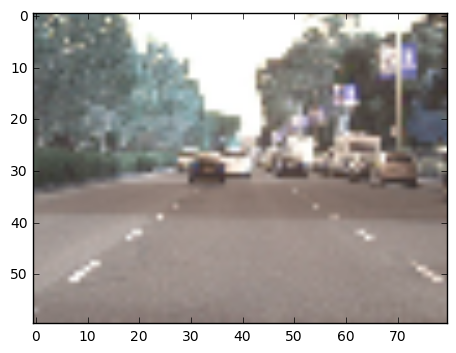

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(images[1])

Writing ./data/submission_test_contrast.tfrecords


TypeError: b'\x01\n\xaa~h\xeb\x80\x14' has type <class 'bytes'>, but expected one of: (<class 'int'>,)

In [108]:
tmp_img_names = img_names

In [109]:
tmp_img_names = np.array([int(img_name.split(".")[0]) for img_name in tmp_img_names])

In [110]:
tmp_img_names[1:10]

array([1477439597173798880, 1477439717240636315, 1477439614826225472,
       1477439556718102526, 1477439727642341252, 1477439612825925725,
       1477439613526155492, 1477439662332895974, 1477439493959199967])

In [112]:
make_tfrecords(images, tmp_img_names, 'data/submission_test')

Writing ./data/submission_test.tfrecords


In [140]:
def export_result(frame_id_lst, steering_angle_lst, model):
    dict = {'frame_id': frame_id_lst, 'steering_angle': steering_angle_lst}
    pd.DataFrame(dict).to_csv("result/%s_output.csv" % model,index=False)

In [144]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import argparse
from input import inputs
import tensorflow as tf
from model.cifarnet import cifarnet
import tensorflow.contrib.slim as slim
from input import inputs
from model.lenet import lenet
from model.vgg16 import vgg16
                            
with tf.Graph().as_default():
    images, img_name = inputs("./data", "submission", 100, None, one_hot_labels=False)
    print('images:', images)
    predictions = cifarnet(images)
    print('predictions:', predictions)
    # Create the model structure. (Parameters will be loaded below.)
    #     predictions, end_points = regression_model(inputs, is_training=False)
    ckpt_dir = 'log/cifarnet/train'
    # Make a session which restores the old parameters from a checkpoint.
    sv = tf.train.Supervisor(logdir=ckpt_dir)
    with sv.managed_session() as sess:
        print('result')
        predictions, img_name = sess.run([predictions, img_name])
        predictions = np.array(predictions)
        print(predictions.shape)
        print(predictions)
        
        # print(labels)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
images: Tensor("input/shuffle_batch:0", shape=(100, 60, 80, 3), dtype=float32)
predictions: Tensor("CifarNet/logits/BiasAdd:0", shape=(100, 1), dtype=float32)
result
(100, 1)
[[-0.02209461]
 [-0.00340446]
 [-0.01478002]
 [-0.01846106]
 [-0.01027485]
 [-0.02379595]
 [-0.00369505]
 [-0.01852846]
 [-0.00942003]
 [-0.00289497]
 [-0.00840052]
 [-0.03313992]
 [-0.03318717]
 [-0.011404  ]
 [-0.00921786]
 [ 0.00505863]
 [-0.00665161]
 [ 0.00084766]
 [-0.0287636 ]
 [ 0.00047973]
 [-0.03885852]
 [-0.02311368]
 [-0.00962802]
 [-0.00193581]
 [-0.00794586]
 [-0.00869662]
 [ 0.0025831 ]
 [-0.01293644]
 [-0.00854176]
 [-0.00451779]
 [-0.02057416]
 [-0.01019491]
 [-0.02001019]
 [ 0.00146399]
 [-0.00420036]
 [-0.00335425]
 [-0.01090134]
 [-0.01207927]
 [-0.01156146]
 [-0.01570806]
 [-0.01684658]
 [-0.00231624]
 [-0.00459673]
 [-0.00211865]
 [ 0.00934241]
 [-0.01653324]
 [-0.01102362]
 [-0.00798912]
 [-0.00100291]
 [

In [145]:
list(np.concatenate(predictions))

[-0.022094611,
 -0.0034044632,
 -0.014780018,
 -0.018461064,
 -0.010274846,
 -0.023795951,
 -0.0036950458,
 -0.018528456,
 -0.0094200298,
 -0.0028949715,
 -0.0084005231,
 -0.033139922,
 -0.033187166,
 -0.011403996,
 -0.0092178565,
 0.0050586271,
 -0.006651605,
 0.00084765907,
 -0.028763603,
 0.00047972566,
 -0.038858518,
 -0.023113681,
 -0.0096280202,
 -0.001935814,
 -0.0079458626,
 -0.0086966213,
 0.0025831,
 -0.012936443,
 -0.0085417591,
 -0.0045177871,
 -0.020574164,
 -0.010194909,
 -0.020010186,
 0.0014639911,
 -0.0042003556,
 -0.003354253,
 -0.010901337,
 -0.012079269,
 -0.011561463,
 -0.015708065,
 -0.01684658,
 -0.0023162449,
 -0.0045967307,
 -0.0021186513,
 0.0093424115,
 -0.016533237,
 -0.011023617,
 -0.0079891216,
 -0.001002911,
 -0.0031150263,
 -0.010837654,
 -0.0049849479,
 -0.014070982,
 -0.015965944,
 -0.014937064,
 -0.010701112,
 -0.0031894145,
 0.0016893884,
 -0.010165865,
 0.01921119,
 -0.0021471134,
 -0.0070952903,
 -0.033968337,
 0.0018523368,
 -0.014120368,
 -0.0078

In [146]:
list(np.concatenate(img_name))

[1477439492108943000,
 1477439719140868631,
 1477439483257688466,
 1477439487508444687,
 1477439532364666455,
 1477439656882126612,
 1477439462104836796,
 1477439403546737008,
 1477439730192434631,
 1477439621277123162,
 1477439595573636036,
 1477439656482191053,
 1477439693737307688,
 1477439669183928956,
 1477439524463560766,
 1477439659632439756,
 1477439643880343789,
 1477439546766682291,
 1477439665133396036,
 1477439444852360193,
 1477439448452821815,
 1477439440151689350,
 1477439429000076049,
 1477439609077263032,
 1477439632128671095,
 1477439587322468962,
 1477439717240636315,
 1477439552217522814,
 1477439613926049085,
 1477439581771542421,
 1477439488908487813,
 1477439627077956077,
 1477439589772827374,
 1477439575520824887,
 1477439478707127499,
 1477439671184145194,
 1477439641529995524,
 1477439646480700631,
 1477439415298768991,
 1477439549617068619,
 1477439642530175691,
 1477439417548546307,
 1477439633578917346,
 1477439445152375621,
 1477439704088760192,
 147743951

In [148]:
export_result([str(img_name) for img_name in list(np.concatenate(img_name))], list(np.concatenate(predictions)), "cifarnet")

In [97]:
import pickle

augmented_test = pickle.load( open( "data/augmented_test.pkl", "rb" ) )

In [75]:
labels = augmented_test['labels']
images = augmented_test['images']

In [78]:
images.shape

(43306, 60, 80, 3)

In [98]:

def _float_feature(value):
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def make_tfrecords(images, labels, type):

    num_examples = labels.shape[0]

    if images.shape[0] != num_examples:
        raise ValueError("Images size %d does not match label size %d." %
                         (images.shape[0], num_examples))
    rows = images.shape[1]
    cols = images.shape[2]
    depth = images.shape[3]

    directory = "."

    filename = os.path.join(directory, type + '.tfrecords')
    print('Writing', filename)
    writer = tf.python_io.TFRecordWriter(filename)
    for index in range(len(labels)):
        image_raw = images[index].tostring()
        example = tf.train.Example(features=tf.train.Features(feature={
            'height': _int64_feature(rows),
            'width': _int64_feature(cols),
            'depth': _int64_feature(depth),
            'label': _float_feature(float(labels[index])),
            'image_raw': _bytes_feature(image_raw)}))
        writer.write(example.SerializeToString())


In [99]:
tmp_labels = []
tmp_images = []
for i in range(images.shape[0]):
    image = augmented_test['images'][i]
    contrast_image = image.copy()
    contrast_image = adjust_gamma(contrast_image, gamma=2)
    tmp_images.append(contrast_image)
    tmp_labels.append(augmented_test['labels'][i])
make_tfrecords(np.array(tmp_images), np.array(tmp_labels), 'data/augmented_test_contrast')

Writing ./data/augmented_test_contrast.tfrecords
